# Install and import packages

In [0]:
#installs python packages needed
!pip install pydap
!pip install netcdf4
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cython
!pip install cartopy

     |████████████████████████████████| 2.3MB 2.8MB/s 
     |████████████████████████████████| 122kB 15.2MB/s 
     |████████████████████████████████| 4.1MB 2.8MB/s 
     |████████████████████████████████| 317kB 26.5MB/s 
Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 2.8MB/s 
Skipping wheel build

In [0]:
# import necessary packages
%pylab inline
import pandas as pd
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

Populating the interactive namespace from numpy and matplotlib


In [0]:
# the folder content the extreme precipitation day data
%cd /content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 3/Project 3/

/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 3/Project 3


# Calculate and plot the long term mean

In [0]:
# loading the long term mean data
uwnd=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4')
vwnd=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4')
hgt=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc', engine='netcdf4')
air=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc', engine='netcdf4')
shum=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc', engine='netcdf4')
skt=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc', engine='netcdf4')
uwnd_sig995=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4')
vwnd_sig995=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4')
pr_wtr=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.mon.1981-2010.ltm.nc', engine='netcdf4')
prate=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/prate.sfc.mon.ltm.nc', engine='netcdf4')
omega=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/omega.mon.1981-2010.ltm.nc', engine='netcdf4')

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

In [0]:
xr.Dataset.info(uwnd)

xarray.Dataset {
dimensions:
	lat = 73 ;
	level = 17 ;
	lon = 144 ;
	nbnds = 2 ;
	time = 12 ;

variables:
	float32 level(level) ;
		level:units = millibar ;
		level:long_name = Level ;
		level:positive = down ;
		level:GRIB_id = 100 ;
		level:GRIB_name = hPa ;
		level:actual_range = [1000.   10.] ;
		level:axis = Z ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [  0.  357.5] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:actual_range = [ 90. -90.] ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
	object time(time) ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0030-00-00 00:00:00 ;
		time:prev_avg_period = 0000-01-00 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:climatology = climatology_bounds ;
		time:climo_period = 1981/01/01 - 2010/12/31 ;
		time:interpreted_actual_range = 000

In [0]:
skt.isel(time=[9,10,11])

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 3)
Coordinates:
  * lon                 (lon) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * time                (time) object 0001-10-01 00:00:00 ... 0001-12-01 00:00:00
  * lat                 (lat) float32 88.542 86.6531 ... -86.6531 -88.542
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    skt                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    title:                          4x daily NMC reanalysis
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    References:                     http://www.esrl.noaa.gov/psd/data/gridded...
    dataset_title:                  NCEP-NCAR Reanalysis 1

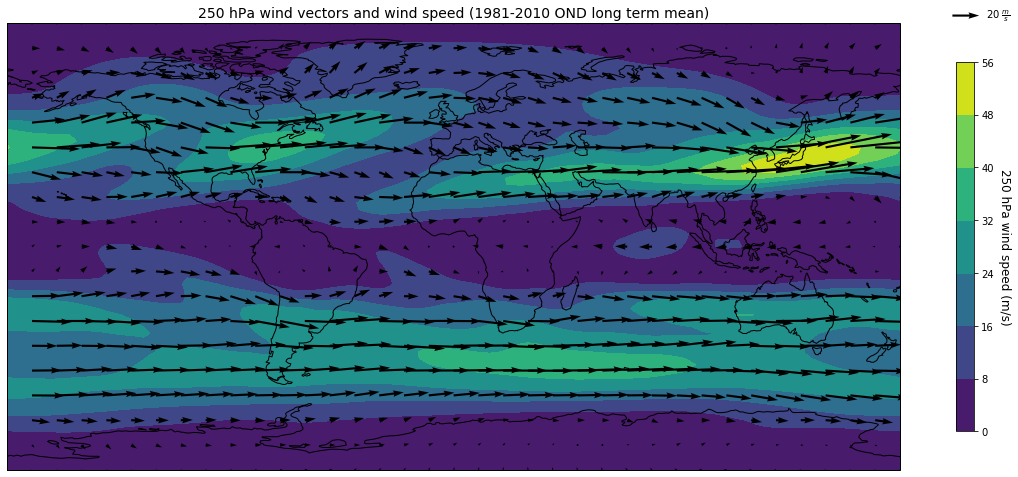

In [0]:
# Figure 1. 250 hPa wind vectors and wind speed
# (1981-2010 OND long term mean)

x = uwnd.lon
y = uwnd.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Caculate wind speed
u = uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
v = vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
wspd_uv = sqrt(u**2+v**2)

# Plot wind speed as filled contours
data = wspd_uv
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('250 hPa wind speed (m/s)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4  # change the density of quiver plot
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 20, r'$20\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('250 hPa wind vectors and wind speed (1981-2010 OND long term mean)', fontsize=14);

plt.show()
fig.savefig("figure1.png", dpi=300)

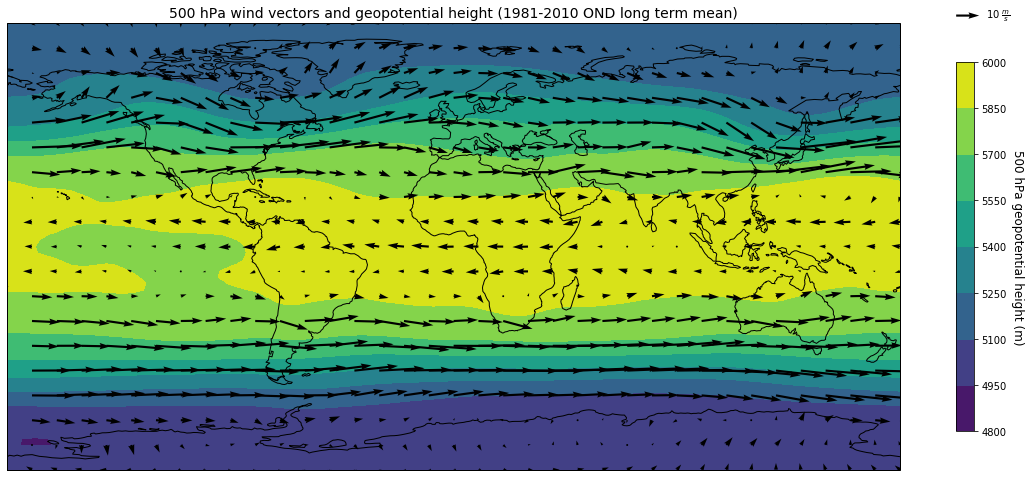

In [0]:
# Figure 2. 500 hPa wind vectors and geopotential height
# (1981-2010 OND long term mean)

x = hgt.lon
y = hgt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot geopotential height as filled contours
data = hgt['hgt'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('500 hPa geopotential height (m)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 10, r'$10\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('500 hPa wind vectors and geopotential height (1981-2010 OND long term mean)', fontsize=14);

plt.show()
fig.savefig("figure2.png", dpi=300)

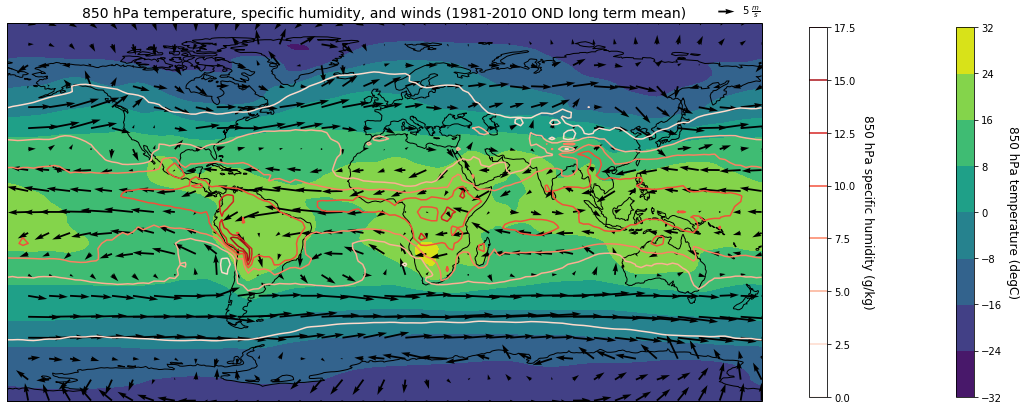

In [0]:
# Figure 3. 850 hPa temperature, specific humidity, and winds
# (1981-2010 OND long term mean)

x = air.lon
y = air.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature as filled contours
data = air['air'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.005, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('850 hPa temperature (degC)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot specific humidity as contours
data = shum['shum'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
# Option 1: plot colorbar for contour
cs = ax.contour(x_cyc, y, data_cyc, transform=ccrs.PlateCarree(), linewidths=1.5, cmap='Reds');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('850 hPa specific humidity (g/kg)', size=12, rotation=-90, verticalalignment='bottom')
# Option 2: label the number on the contour
# cs = ax.contour(x, y, data, transform=ccrs.PlateCarree(), linewidths=1.5, cmap='Reds');
# ax.clabel(cs, inline=1, fmt='%2.1f', fontsize=14)

# Plot wind barbs, but not all of them
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd['uwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd['vwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.63, 0.83, 5, r'$5\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('850 hPa temperature, specific humidity, and winds (1981-2010 OND long term mean)', fontsize=14);

plt.show()
fig.savefig("figure3.png", dpi=300)

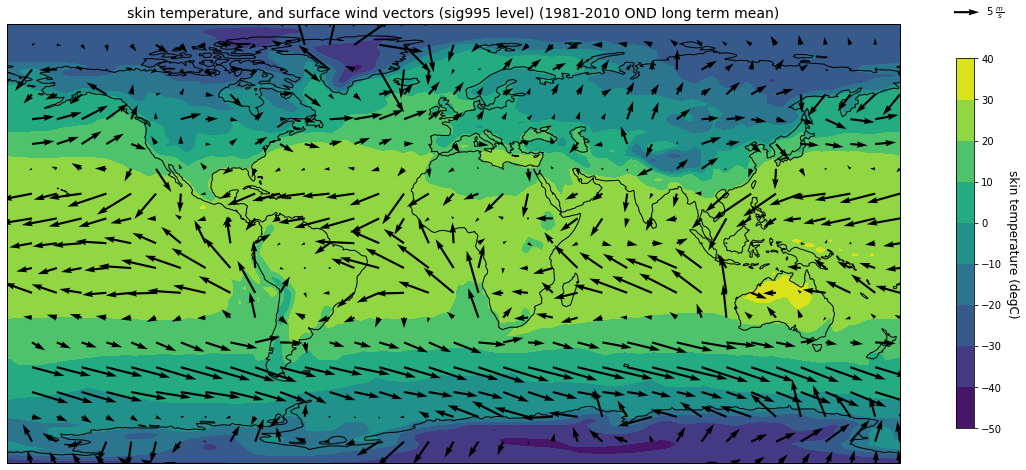

In [0]:
# Figure 4. skin temperature, and surface wind vectors (sig995 level)
# (1981-2010 OND long term mean)

# For skin temperature, lat: 94, lon: 192
x = skt.lon
y = skt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot skin temperature as filled contours
data = skt['skt'].isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('skin temperature (degC)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
# For uwnd_sig995, lat: 73, lon: 144
x = uwnd_sig995.lon
y = uwnd_sig995.lat
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         uwnd_sig995['uwnd'].isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides],
         vwnd_sig995['vwnd'].isel(time=[9,10,11]).mean(dim='time').values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 5, r'$5\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('skin temperature, and surface wind vectors (sig995 level) (1981-2010 OND long term mean)', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure4.png", dpi=300)

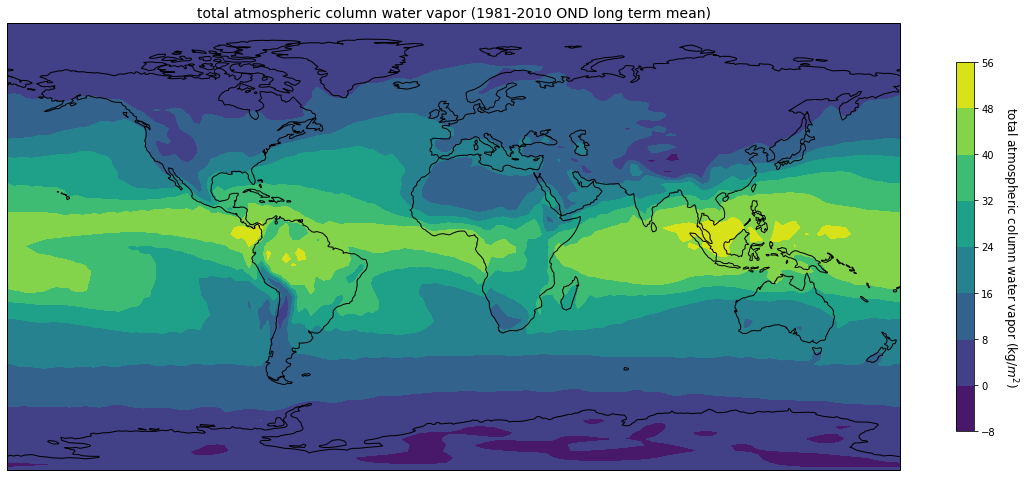

In [0]:
# Figure 5. total atmospheric column water vapor
# (1981-2010 OND long term mean)

x = pr_wtr.lon
y = pr_wtr.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = pr_wtr['pr_wtr'].isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('total atmospheric column water vapor (kg/$m^2$)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('total atmospheric column water vapor (1981-2010 OND long term mean)', fontsize=14);

plt.show()
fig.savefig("figure5.png", dpi=300)

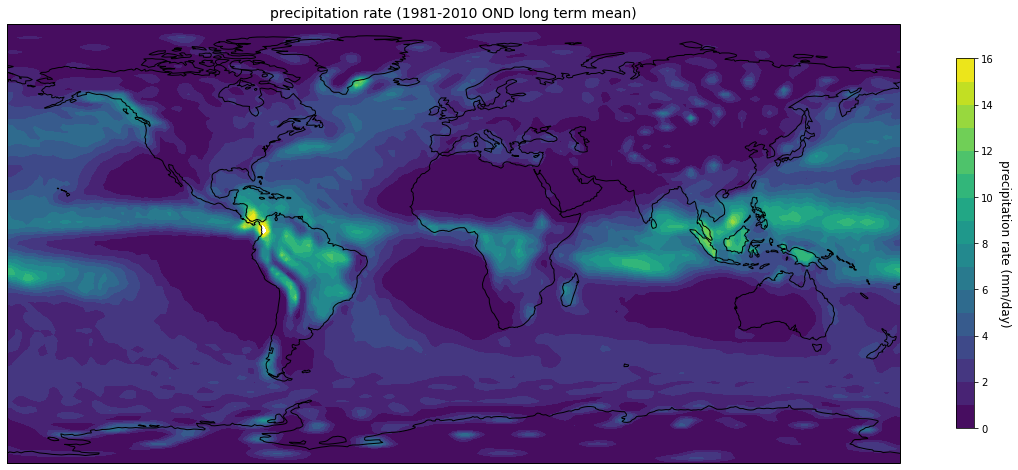

In [0]:
# Figure 6. precipitation rate
# (1981-2010 OND long term mean)

x = prate.lon
y = prate.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = prate['prate'].isel(time=[9,10,11]).mean(dim='time')*86400 # kg/m^2/s to mm/day
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(0, 17), transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('precipitation rate (mm/day)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('precipitation rate (1981-2010 OND long term mean)', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure6.png", dpi=300)

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


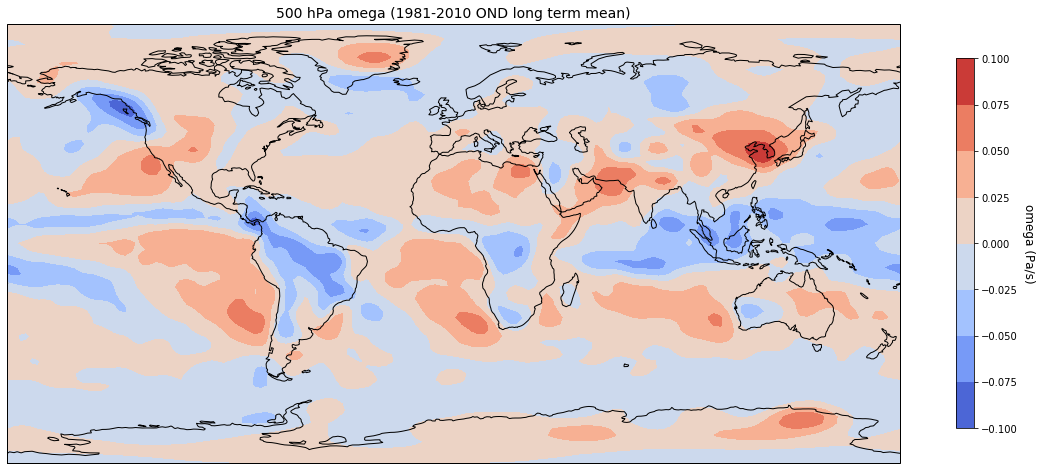

In [0]:
# Figure 7. 500 hPa omega
# (1981-2010 OND long term mean)

x = omega.lon
y = omega.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = omega['omega'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('omega (Pa/s)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('500 hPa omega (1981-2010 OND long term mean)', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure7.png", dpi=300)

# Calculate extreme precipitation day composite

In [0]:
dates_95 = xr.open_dataset('datesexceeded.nc') # extreme precipitation date

In [0]:
dates = pd.to_datetime(dates_95.time.values)
dates

DatetimeIndex(['1996-11-08', '1996-11-18', '1996-11-20', '1996-11-25',
               '1996-11-30', '1996-12-06', '1997-10-31', '1997-11-11',
               '1997-12-16', '1997-12-23',
               ...
               '2018-12-02', '2018-12-23', '2018-12-25', '2018-12-26',
               '2019-10-06', '2019-10-14', '2019-10-15', '2019-10-17',
               '2019-11-16', '2019-11-26'],
              dtype='datetime64[ns]', length=238, freq=None)

In [0]:
iyr = 1996
dates_yr = dates[where(dates.year == iyr)]
dates_yr

DatetimeIndex(['1996-11-08', '1996-11-18', '1996-11-20', '1996-11-25',
               '1996-11-30', '1996-12-06'],
              dtype='datetime64[ns]', freq=None)

In [0]:
%%time
# loading the daily data for extreme precip dates
years = pd.date_range(start='1996-01-01', end='2019-12-01', freq='AS')
varname = ['uwnd','vwnd','hgt','air','shum','skt','uwnd_sig995','vwnd_sig995','pr_wtr','prate','omega']

data_list = {}
for ivar in varname:
  data_list[ivar] = []

for iyr in years.year:
  print('working on '+str(iyr))
  # extreme precip dates for this year
  dates_yr = dates[where(dates.year == iyr)]
  print('how many extreme dates?', dates_yr.size)
  # collect data except for wspd, which is not available in daily dataset
  data_sel = {}
  data_sel['uwnd'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['vwnd'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['hgt'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(iyr)+'.nc', engine='netcdf4').sel(level=500, time=dates_yr)
  data_sel['air'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/air.'+str(iyr)+'.nc', engine='netcdf4').sel(level=850, time=dates_yr)
  data_sel['shum'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/shum.'+str(iyr)+'.nc', engine='netcdf4').sel(level=850, time=dates_yr)
  data_sel['skt'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['uwnd_sig995'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/uwnd.sig995.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['vwnd_sig995'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/vwnd.sig995.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['pr_wtr'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/pr_wtr.eatm.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['prate'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/prate.sfc.gauss.'+str(iyr)+'.nc', engine='netcdf4').sel(time=dates_yr)
  data_sel['omega'] = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/omega.'+str(iyr)+'.nc', engine='netcdf4').sel(level=500, time=dates_yr)
  for ivar in varname:
    data_list[ivar].append(data_sel[ivar])

# concatenate the data and calculate the time average
print('concatenate the data and calculate the time average')
extremes_tavg = {}
for ivar in varname:
  extremes_tavg[ivar] = xr.concat(data_list[ivar], dim='time').mean(dim='time')


working on 1996
how many extreme dates? 6
working on 1997
how many extreme dates? 4
working on 1998
how many extreme dates? 4
working on 1999
how many extreme dates? 11
working on 2000
how many extreme dates? 12
working on 2001
how many extreme dates? 7
working on 2002
how many extreme dates? 9
working on 2003
how many extreme dates? 8
working on 2004
how many extreme dates? 13
working on 2005
how many extreme dates? 10
working on 2006
how many extreme dates? 13
working on 2007
how many extreme dates? 15
working on 2008
how many extreme dates? 9
working on 2009
how many extreme dates? 9
working on 2010
how many extreme dates? 12
working on 2011
how many extreme dates? 6
working on 2012
how many extreme dates? 13
working on 2013
how many extreme dates? 8
working on 2014
how many extreme dates? 7
working on 2015
how many extreme dates? 14
working on 2016
how many extreme dates? 13
working on 2017
how many extreme dates? 19
working on 2018
how many extreme dates? 10
working on 2019
how ma

In [0]:
# save the extreme precipitation day composite 
for ivar in varname:
  filename = 'extremes_tavg_' + ivar
  extremes_tavg[ivar].to_netcdf('./' + filename)

In [0]:
# # we can use the saved data instead of generating the data again
# extremes_tavg = {}
# for ivar in varname:
#   extremes_tavg[ivar] = xr.open_dataset('./extremes_tavg_'+ivar)

In [0]:
extremes_tavg['air']

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
    level    float32 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Data variables:
    air      (lat, lon) float32 ...

# Plot extreme precipitation day composite

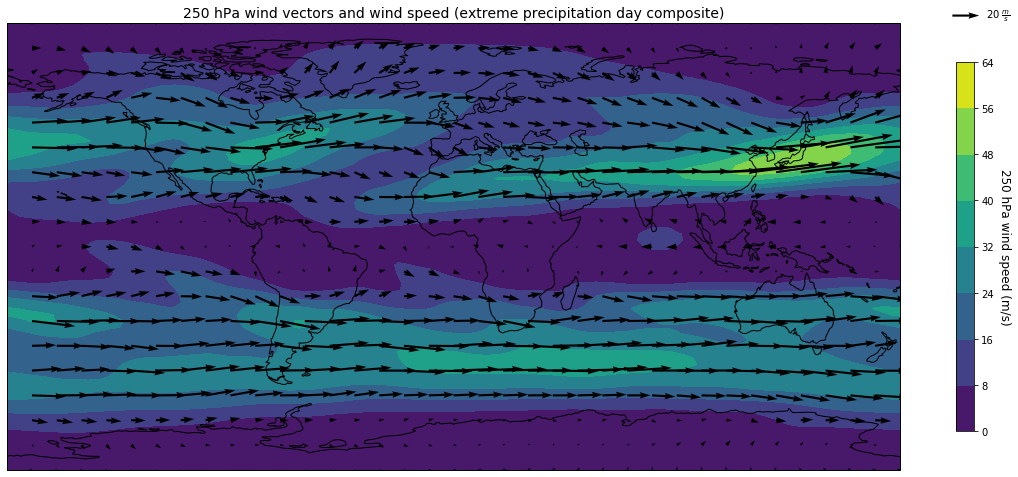

In [0]:
# Figure 8. 250 hPa wind vectors and wind speed
# (extreme precipitation day composite)

x = extremes_tavg['uwnd'].lon
y = extremes_tavg['uwnd'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Caculate wind speed
u = extremes_tavg['uwnd'].sel(level=250.)
v = extremes_tavg['vwnd'].sel(level=250.)
wspd_uv = sqrt(u['uwnd']**2+v['vwnd']**2)

# Plot wind speed as filled contours
data = wspd_uv
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('250 hPa wind speed (m/s)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global()
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4  # change the density of quiver plot
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u['uwnd'][::quiver_strides,::quiver_strides],
         v['vwnd'][::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 20, r'$20\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('250 hPa wind vectors and wind speed (extreme precipitation day composite)', fontsize=14);

plt.show()
fig.savefig("figure8.png", dpi=300)

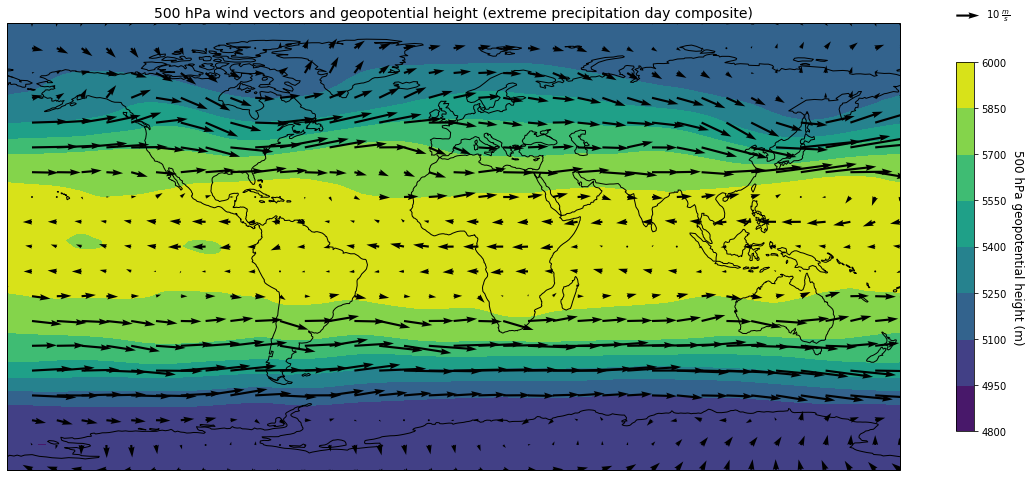

In [0]:
# Figure 9. 500 hPa wind vectors and geopotential height
# (extreme precipitation day composite)

x = extremes_tavg['hgt'].lon
y = extremes_tavg['hgt'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot geopotential height as filled contours
data = extremes_tavg['hgt']['hgt']
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('500 hPa geopotential height (m)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         extremes_tavg['uwnd'].sel(level=500.)['uwnd'][::quiver_strides,::quiver_strides],
         extremes_tavg['vwnd'].sel(level=500.)['vwnd'][::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 10, r'$10\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('500 hPa wind vectors and geopotential height (extreme precipitation day composite)', fontsize=14);

plt.show()
fig.savefig("figure9.png", dpi=300)

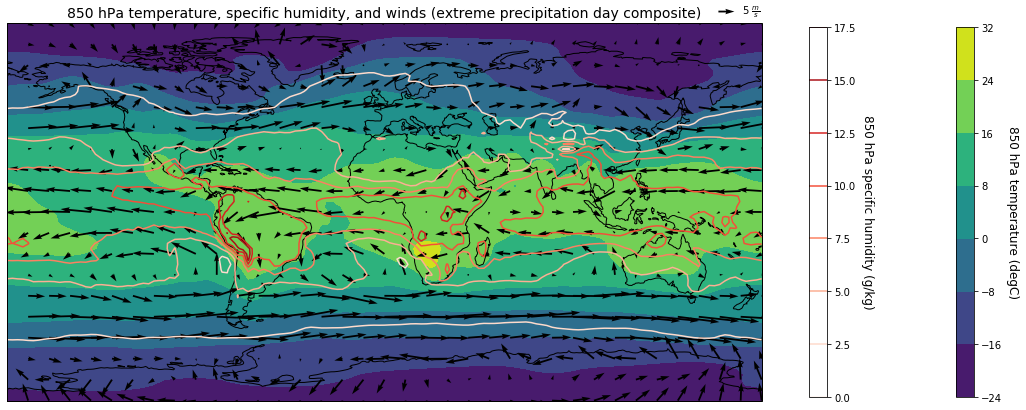

In [0]:
# Figure 10. 850 hPa temperature, specific humidity, and winds
# (extreme precipitation day composite)

x = extremes_tavg['air'].lon
y = extremes_tavg['air'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature as filled contours
data = extremes_tavg['air']['air'] - 273.15 # K to degC
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.005, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('850 hPa temperature (degC)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot specific humidity as contours
data = extremes_tavg['shum']['shum'] * 1000 # kg/kg to g/kg
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
# Option 1: plot colorbar for contour
cs = ax.contour(x_cyc, y, data_cyc, transform=ccrs.PlateCarree(), linewidths=1.5, cmap='Reds');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('850 hPa specific humidity (g/kg)', size=12, rotation=-90, verticalalignment='bottom')
# Option 2: label the number on the contour
# cs = ax.contour(x, y, data, transform=ccrs.PlateCarree(), linewidths=1.5, cmap='Reds');
# ax.clabel(cs, inline=1, fmt='%2.1f', fontsize=14)

# Plot wind barbs, but not all of them
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         extremes_tavg['uwnd'].sel(level=850.)['uwnd'][::quiver_strides,::quiver_strides],
         extremes_tavg['vwnd'].sel(level=850.)['vwnd'][::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.63, 0.83, 5, r'$5\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('850 hPa temperature, specific humidity, and winds (extreme precipitation day composite)', fontsize=14);

plt.show()
fig.savefig("figure10.png", dpi=300)

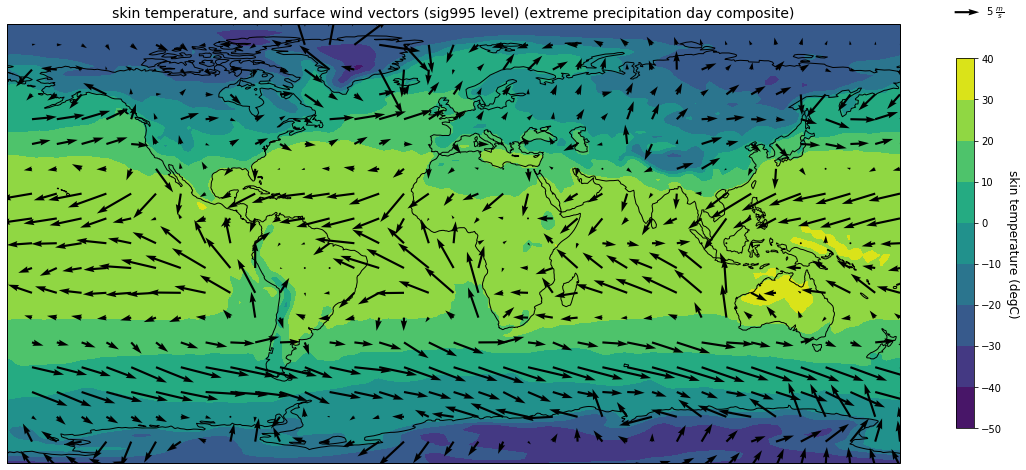

In [0]:
# Figure 11. skin temperature, and surface wind vectors (sig995 level)
# (extreme precipitation day composite)

# For skin temperature, lat: 94, lon: 192
x = extremes_tavg['skt'].lon
y = extremes_tavg['skt'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot skin temperature as filled contours
data = extremes_tavg['skt']['skt'] - 273.15 # K to degC
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('skin temperature (degC)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
# For uwnd_sig995, lat: 73, lon: 144
x = extremes_tavg['uwnd_sig995'].lon
y = extremes_tavg['uwnd_sig995'].lat
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         extremes_tavg['uwnd_sig995']['uwnd'][::quiver_strides,::quiver_strides],
         extremes_tavg['vwnd_sig995']['vwnd'][::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 5, r'$5\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('skin temperature, and surface wind vectors (sig995 level) (extreme precipitation day composite)', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure11.png", dpi=300)

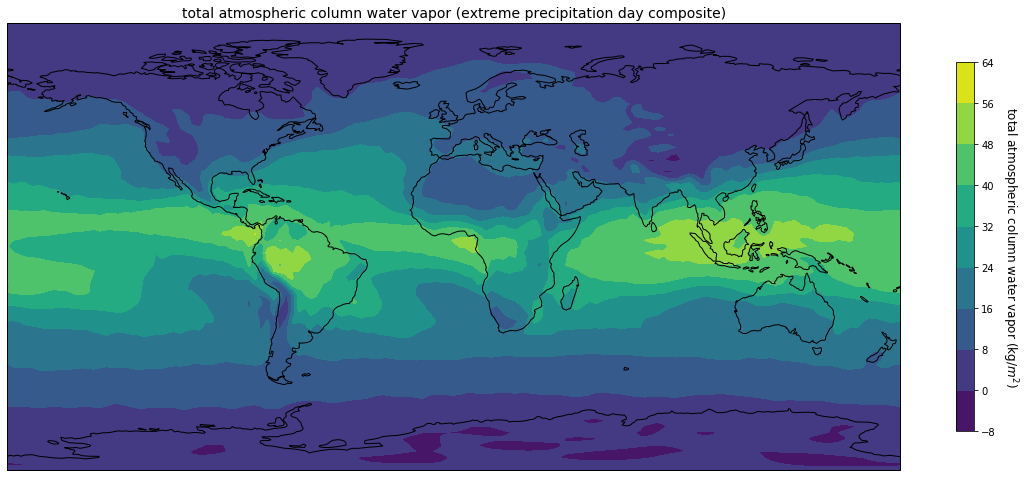

In [0]:
# Figure 12. total atmospheric column water vapor
# (extreme precipitation day composite)

x = extremes_tavg['pr_wtr'].lon
y = extremes_tavg['pr_wtr'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = extremes_tavg['pr_wtr']['pr_wtr']
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('total atmospheric column water vapor (kg/$m^2$)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('total atmospheric column water vapor (extreme precipitation day composite)', fontsize=14);

plt.show()
fig.savefig("figure12.png", dpi=300)

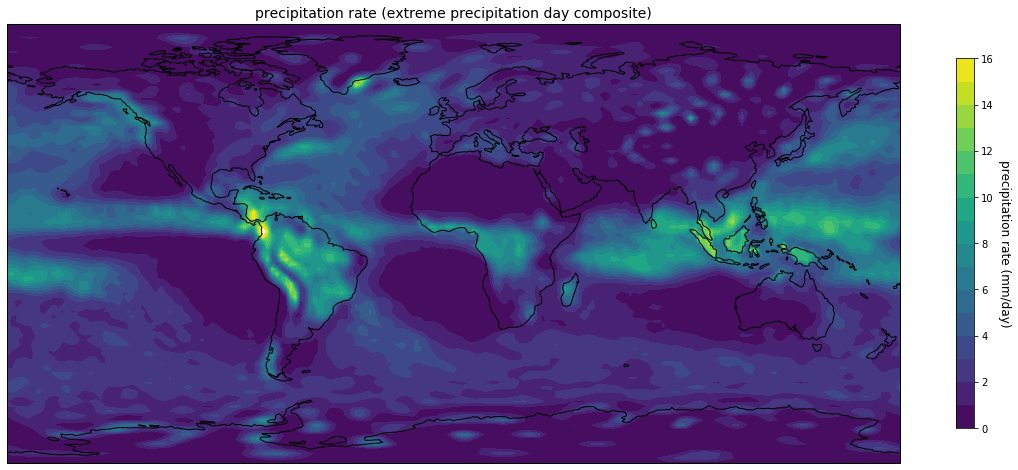

In [0]:
# Figure 13. precipitation rate
# (extreme precipitation day composite)

x = extremes_tavg['prate'].lon
y = extremes_tavg['prate'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = extremes_tavg['prate']['prate']*86400 # kg/m^2/s to mm/day
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(0, 17), transform=ccrs.PlateCarree());
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('precipitation rate (mm/day)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('precipitation rate (extreme precipitation day composite)', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure13.png", dpi=300)

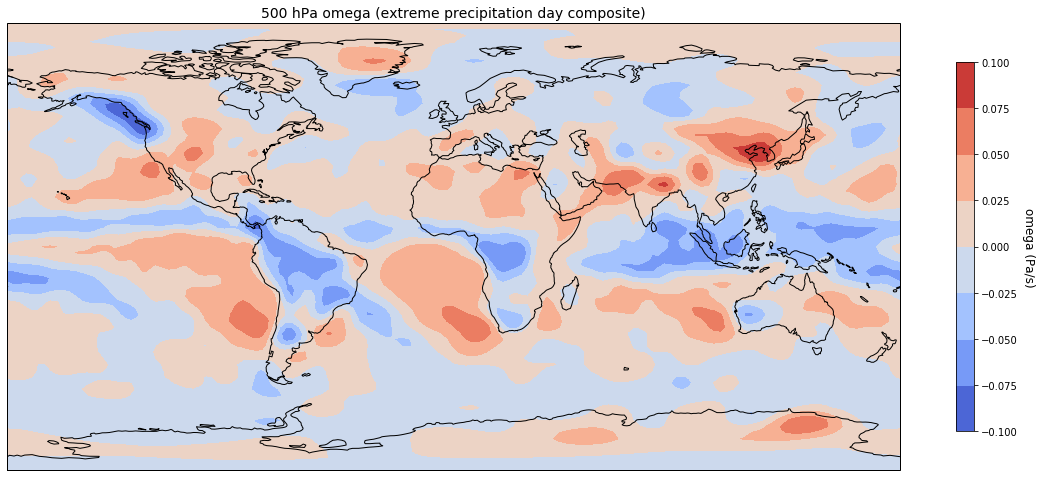

In [0]:
# Figure 14. 500 hPa omega
# (extreme precipitation day composite)

x = extremes_tavg['omega'].lon
y = extremes_tavg['omega'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
data = extremes_tavg['omega']['omega']
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('omega (Pa/s)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('500 hPa omega (extreme precipitation day composite)', fontsize=14);

plt.show()
fig.savefig("figure14.png", dpi=300)

# Plot extreme precipitation day anomaly

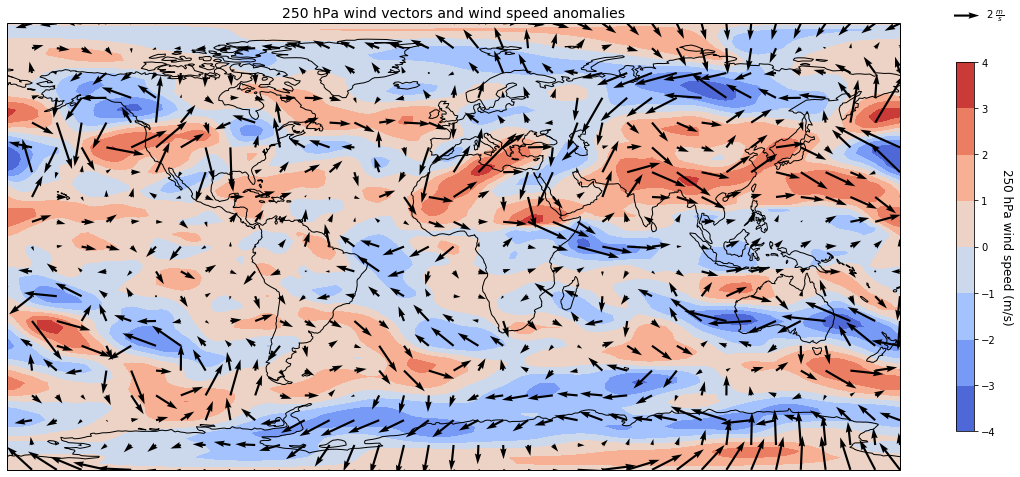

In [0]:
# Figure 15. 250 hPa wind vectors and wind speed anomalies
# (compared with 1981-2010 OND long term mean)

x = uwnd.lon
y = uwnd.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot wind speed as filled contours
u = uwnd['uwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
v = vwnd['vwnd'].sel(level=250.).isel(time=[9,10,11]).mean(dim='time')
wspd_uv = sqrt(u**2+v**2)
u_ext = extremes_tavg['uwnd'].sel(level=250.)
v_ext = extremes_tavg['vwnd'].sel(level=250.)
wspd_uv_ext = sqrt(u_ext['uwnd']**2 + v_ext['vwnd']**2)
u_diff = u_ext['uwnd'] - u
v_diff = v_ext['vwnd'] - v
wspd_uv_diff = wspd_uv_ext - wspd_uv

data = wspd_uv_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-4,5,1), transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('250 hPa wind speed (m/s)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u_diff.values[::quiver_strides,::quiver_strides],
         v_diff.values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 2, r'$2\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('250 hPa wind vectors and wind speed anomalies', fontsize=14);

plt.show()
fig.savefig("figure15.png", dpi=300)

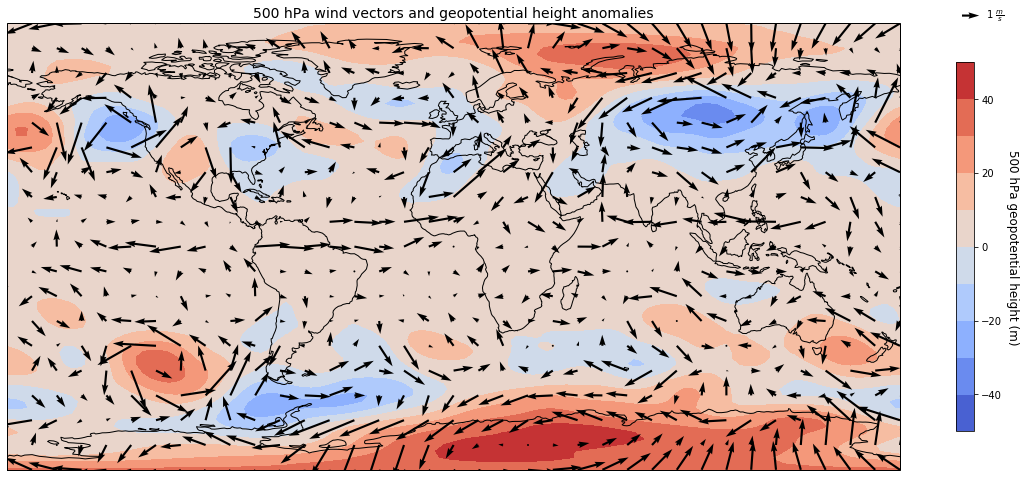

In [0]:
# Figure 16. 500 hPa wind vectors and geopotential height anomalies
# (compared with 1981-2010 OND long term mean)

x = hgt.lon
y = hgt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot geopotential height as filled contours
hgt_ltm = hgt['hgt'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
hgt_ext = extremes_tavg['hgt']
hgt_diff = hgt_ext['hgt'] - hgt_ltm

data = hgt_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-50, 51, 10), transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('500 hPa geopotential height (m)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
u = uwnd['uwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
v = vwnd['vwnd'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
u_ext = extremes_tavg['uwnd'].sel(level=500.)
v_ext = extremes_tavg['vwnd'].sel(level=500.)
u_diff = u_ext['uwnd'] - u
v_diff = v_ext['vwnd'] - v

quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u_diff.values[::quiver_strides,::quiver_strides],
         v_diff.values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 1, r'$1\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('500 hPa wind vectors and geopotential height anomalies', fontsize=14);

plt.show()
fig.savefig("figure16.png", dpi=300)

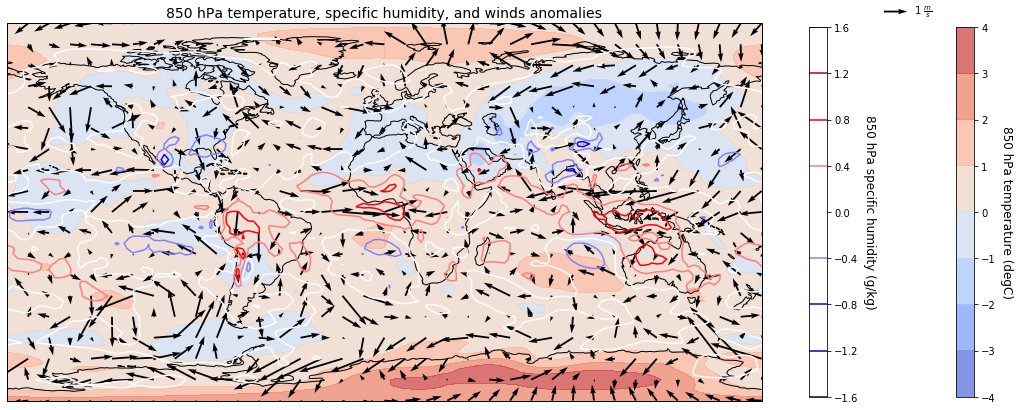

In [0]:
# Figure 17. 850 hPa temperature, specific humidity, and winds anomalies
# (compared with 1981-2010 OND long term mean)

x = air.lon
y = air.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature as filled contours
air_ltm = air['air'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
air_ext = extremes_tavg['air'] - 273.15
air_diff = air_ext['air'] - air_ltm

data = air_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-4,5,1), transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.7);
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.005, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('850 hPa temperature (degC)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot specific humidity as contours
shum_ltm = shum['shum'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
shum_ext = extremes_tavg['shum'] * 1000.
shum_diff = shum_ext['shum'] - shum_ltm

data = shum_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
# Option 1: plot colorbar for contour
cs = ax.contour(x_cyc, y, data_cyc, np.arange(-1.6,1.7,0.4), transform=ccrs.PlateCarree(), linewidths=1.5, cmap='seismic', alpha=1);
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('850 hPa specific humidity (g/kg)', size=12, rotation=-90, verticalalignment='bottom')
# Option 2: label the number on the contour
# cs = ax.contour(x, y, data, transform=ccrs.PlateCarree(), linewidths=1.5, cmap='Reds');
# ax.clabel(cs, inline=1, fmt='%2.1f', fontsize=14)

# Plot wind barbs, but not all of them
u850_ltm = uwnd['uwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
v850_ltm = vwnd['vwnd'].sel(level=850.).isel(time=[9,10,11]).mean(dim='time')
u850_ext = extremes_tavg['uwnd'].sel(level=850.)
v850_ext = extremes_tavg['vwnd'].sel(level=850.)
u_diff = u850_ext['uwnd'] - u850_ltm
v_diff = v850_ext['vwnd'] - v850_ltm

quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         u_diff.values[::quiver_strides,::quiver_strides],
         v_diff.values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.75, 0.83, 1, r'$1\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('850 hPa temperature, specific humidity, and winds anomalies', fontsize=14);

plt.show()
fig.savefig("figure17.png", dpi=300)

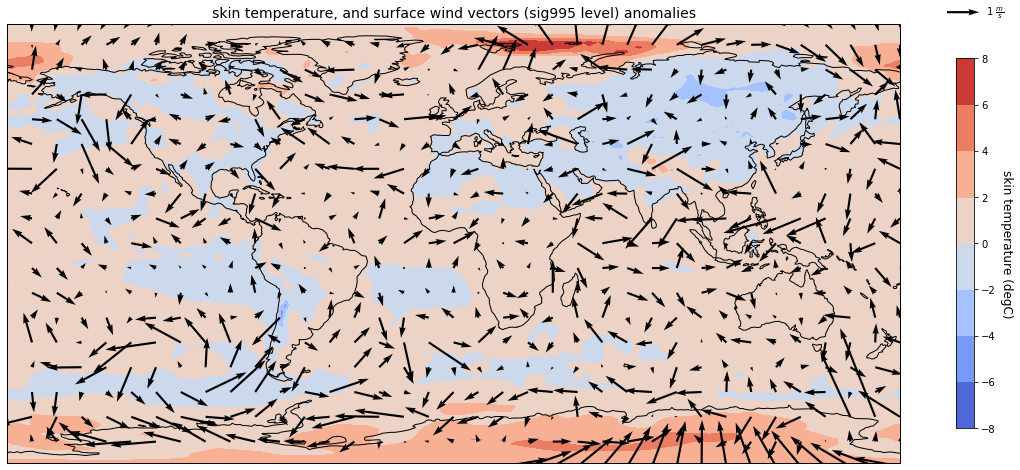

In [0]:
# Figure 18. skin temperature, and surface wind vectors (sig995 level) anomalies
# (compared with 1981-2010 OND long term mean)

# For skin temperature, lat: 94, lon: 192
x = skt.lon
y = skt.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot skin temperature as filled contours
skt_ltm = skt['skt'].isel(time=[9,10,11]).mean(dim='time')
skt_ext = extremes_tavg['skt'] - 273.15
skt_diff = skt_ext['skt'] - skt_ltm

data = skt_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-8,9,2), transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('skin temperature (degC)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()

# Plot wind barbs, but not all of them
# For uwnd_sig995, lat: 73, lon: 144
x = uwnd_sig995.lon
y = uwnd_sig995.lat
usfc_ltm = uwnd_sig995['uwnd'].isel(time=[9,10,11]).mean(dim='time')
vsfc_ltm = vwnd_sig995['vwnd'].isel(time=[9,10,11]).mean(dim='time')
usfc_ext = extremes_tavg['uwnd_sig995']
vsfc_ext = extremes_tavg['vwnd_sig995']
usfc_diff = usfc_ext['uwnd'] - usfc_ltm
vsfc_diff = vsfc_ext['vwnd'] - vsfc_ltm

quiver_strides = 4
Q = ax.quiver(x[::quiver_strides], y[::quiver_strides], 
         usfc_diff.values[::quiver_strides,::quiver_strides],
         vsfc_diff.values[::quiver_strides,::quiver_strides])
qk = ax.quiverkey(Q, 0.8, 0.88, 1, r'$1\ \frac{m}{s}$', labelpos='E', coordinates='figure')
ax.set_title('skin temperature, and surface wind vectors (sig995 level) anomalies', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure18.png", dpi=300)

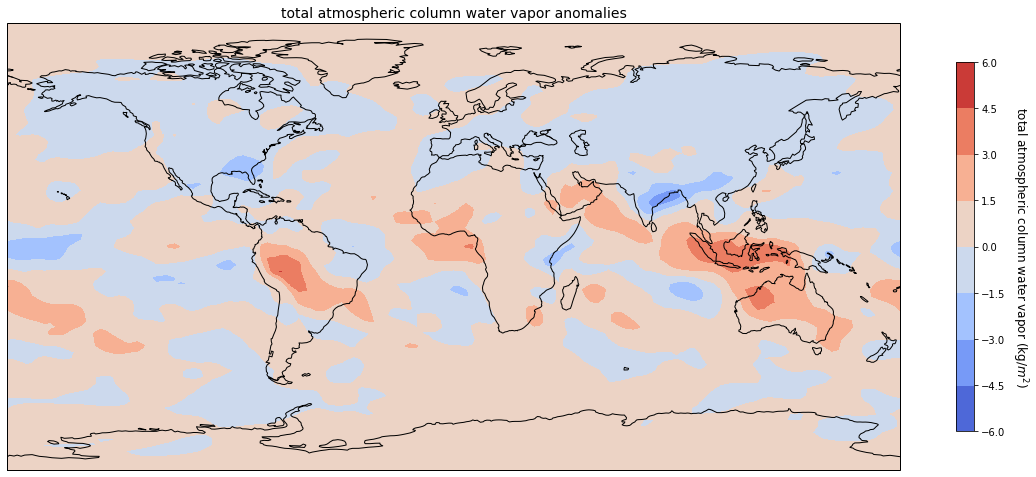

In [0]:
# Figure 19. total atmospheric column water vapor anomalies
# (compared with 1981-2010 OND long term mean)

x = pr_wtr.lon
y = pr_wtr.lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
pr_wtr_ltm = pr_wtr['pr_wtr'].isel(time=[9,10,11]).mean(dim='time')
pr_wtr_ext = extremes_tavg['pr_wtr']
pr_wtr_diff = pr_wtr_ext['pr_wtr'] - pr_wtr_ltm

data = pr_wtr_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x)
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-6,7,1.5), transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('total atmospheric column water vapor (kg/$m^2$)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('total atmospheric column water vapor anomalies', fontsize=14);

plt.show()
fig.savefig("figure19.png", dpi=300)

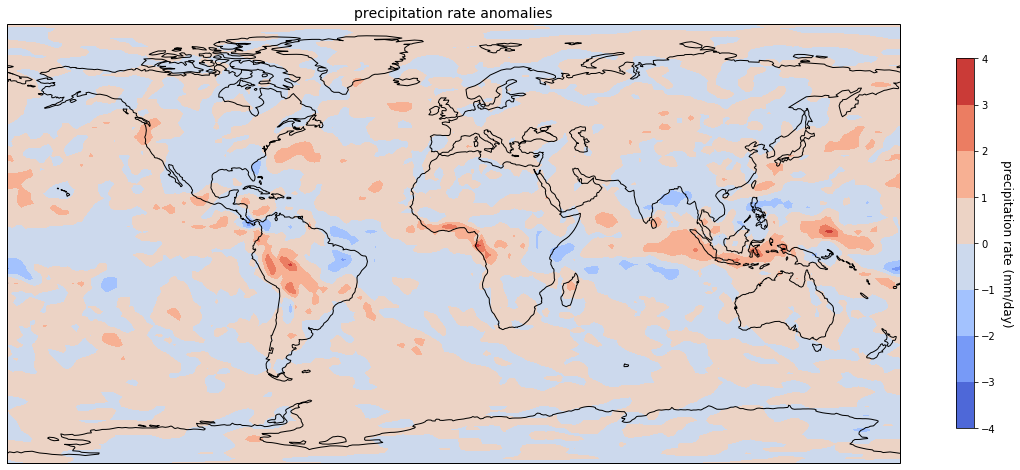

In [0]:
# Figure 20. precipitation rate anomalies
# (compared with 1981-2010 OND long term mean)

x = extremes_tavg['prate'].lon
y = extremes_tavg['prate'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
prate_ltm = prate['prate'].isel(time=[9,10,11]).mean(dim='time')
prate_ext = extremes_tavg['prate']
prate_diff = prate_ext['prate'] - prate_ltm

data = prate_diff * 86400 # kg/m^2/s to mm/day
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-4,5,1), transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('precipitation rate (mm/day)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('precipitation rate anomalies', fontsize=14);
ax.set_ylim(-88.542, 88.542)

plt.show()
fig.savefig("figure20.png", dpi=300)

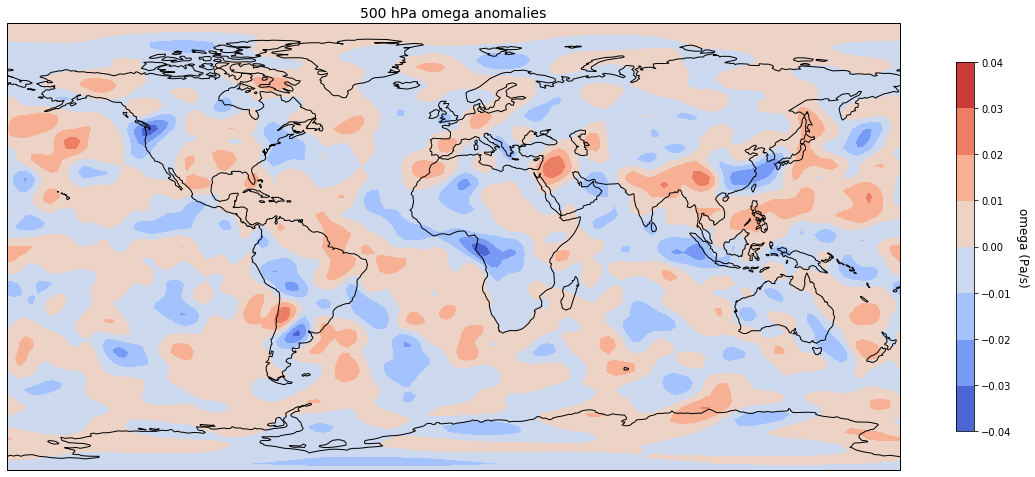

In [0]:
# Figure 21. 500 hPa omega anomalies
# (compared with 1981-2010 OND long term mean)

x = extremes_tavg['omega'].lon
y = extremes_tavg['omega'].lat

# Create the matplotlib figure and axis
fig = plt.figure(figsize=(20,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot total atmospheric column water vapor as filled contours
omega_ltm = omega['omega'].sel(level=500.).isel(time=[9,10,11]).mean(dim='time')
omega_ext = extremes_tavg['omega']
omega_diff = omega_ext['omega'] - omega_ltm

data = omega_diff
data_cyc, x_cyc = cutil.add_cyclic_point(data, coord=x) # Add cyclic point
cs = ax.contourf(x_cyc, y, data_cyc, np.arange(-0.04,0.05,0.01), transform=ccrs.PlateCarree(), cmap='coolwarm');
cax, kw = matplotlib.colorbar.make_axes(ax, location='right', pad=0.05, shrink=0.8)
out = fig.colorbar(cs, cax=cax, extend='both')
label = out.set_label('omega (Pa/s)', size=12, rotation=-90, verticalalignment='bottom')
ax.set_global() 
ax.coastlines()
ax.set_title('500 hPa omega anomalies', fontsize=14);

plt.show()
fig.savefig("figure21.png", dpi=300)